# Potential appendix plots

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from wordcloud import WordCloud

plt.style.use(["ggplot", "icm.mplstyle"])

from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def sepsis_def_to_idx(sepsis_def):
    return sepsis_definition_criterions.index(sepsis_def)

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(12/256, 1, N)
vals[:, 1] = np.linspace(56/256, 1, N)
vals[:, 2] = np.linspace(92/256, 1, N)
icm_cmp = ListedColormap(vals)
icm_cmp_rev = ListedColormap(vals[::-1,:])

In [2]:
papers_df = pd.read_csv(os.path.join("data", "review_final.csv"))
papers_df.drop("Comments (enter 'N/A' if none)", axis=1, inplace=True)

Questions:
 - How many datasets ?
 - Datasets used VS year ?

## Some summary stats

In [3]:
for year in range(2010, 2023):
    n_papers = (papers_df["Year of publication"] >= year).sum()
    print(
        f"{year} and after:",
        n_papers,
        f"({round(100 * n_papers / papers_df.shape[0], 1)}%)"
    )

2010 and after: 70 (95.9%)
2011 and after: 69 (94.5%)
2012 and after: 69 (94.5%)
2013 and after: 67 (91.8%)
2014 and after: 66 (90.4%)
2015 and after: 65 (89.0%)
2016 and after: 65 (89.0%)
2017 and after: 61 (83.6%)
2018 and after: 58 (79.5%)
2019 and after: 46 (63.0%)
2020 and after: 34 (46.6%)
2021 and after: 20 (27.4%)
2022 and after: 0 (0.0%)


## Wordcloud of titles

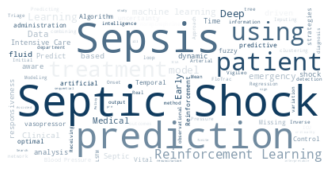

In [4]:
wordcloud = WordCloud(
    background_color="white",
    colormap=icm_cmp,
).generate(papers_df["Title"].str.cat())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(os.path.join("out", f"Supp - Wordcloud all.png"))
plt.show()

## Funding sources

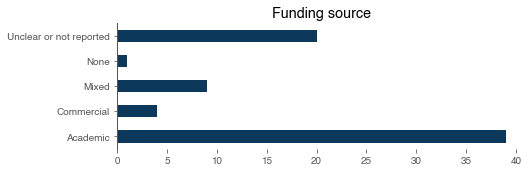

Breaksown
Funding source
Academic                   53.424658
Commercial                  5.479452
Mixed                      12.328767
None                        1.369863
Unclear or not reported    27.397260
Name: Title, dtype: float64


In [5]:
papers_df.groupby("Funding source")["Title"].count().plot.barh()

plt.ylabel("")
plt.gca().spines['bottom'].set_visible(False)

plt.title("Funding source")
plt.savefig(os.path.join("out", f"Supp - Funding bar.png"))
plt.show()


fundong_source_df = papers_df.groupby("Funding source")["Title"].count()
print("Breaksown")
print(fundong_source_df / fundong_source_df.sum() * 100)

Funding source over the years:

In [39]:
list(papers_df['Funding source'].unique())

['Academic', 'None', 'Unclear or not reported', 'Commercial', 'Mixed']

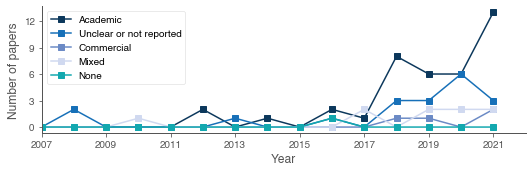

In [40]:
tmp_df = pd.crosstab(papers_df["Year of publication"], papers_df["Funding source"])
learning_types = [
    'Academic', 'Unclear or not reported', 'Commercial', 'Mixed', 'None'
]



# Add lines for years without papers
comp_df = dict()
for year in np.arange(2007, 2021, 1):
    if year not in tmp_df.index:
        comp_df[year] = {c: 0 for c in tmp_df.columns}
comp_df = pd.DataFrame(comp_df)

tmp_df = pd.concat([tmp_df, comp_df.T], axis=0)

index = np.array(sorted(list(tmp_df.index)))
bar_width = 0.24
for itr, algo_type in enumerate(learning_types):
    plt.plot(index, tmp_df.loc[index, algo_type], label=algo_type, marker="s")
plt.xlim(2007, 2022)
plt.xticks(np.arange(2007, 2022, 2), np.arange(2007, 2022, 2))
plt.xlabel('Year')
plt.yticks(np.arange(0, 13, 3), np.arange(0, 13, 3))
plt.ylabel("Number of papers")

plt.legend(title="")
plt.savefig(os.path.join("out", f"Supp - Funding VS time.png"))
plt.show()

Observations:
 - Overall, 29.3% of the extracted papers have an unclear or unspecified funding source
 - Most papers benefit from academoic funding, but mixed and industry funded papers seem to be on the rise

## Extent of validation

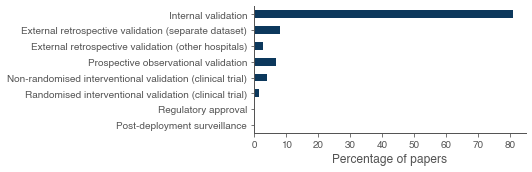

In [7]:
validation_stages = [
    "Internal validation",
    "External retrospective validation (separate dataset)",
    "External retrospective validation (other hospitals)",
    "Prospective observational validation",
    "Non-randomised interventional validation (clinical trial)",
    "Randomised interventional validation (clinical trial)",
    "Regulatory approval",
    "Post-deployment surveillance"
]
(100*papers_df[validation_stages].mean()).plot.barh()
plt.title("")
plt.xlabel("Percentage of papers")
plt.yticks(list(range(len(validation_stages))), validation_stages)
plt.gca().invert_yaxis()

plt.savefig(os.path.join("out", f"Supp - Validation stage bar.png"))
plt.show()

## Sepsis definition

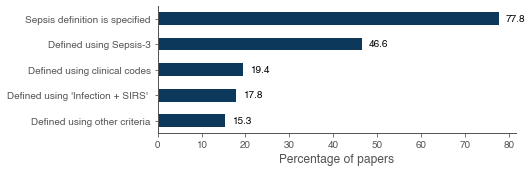

In [8]:
sepsis_definition_criterions = [
    "Sepsis definition is specified",
    "Defined using Sepsis-3",
    "Defined using 'Infection + SIRS' ",
    "Defined using clinical codes",
    "Defined using other criteria",
]

counts = 100*papers_df[sepsis_definition_criterions].mean()
indices = np.argsort(counts)
y_position = np.arange(len(counts))

bars = plt.barh(y_position, counts[indices], height=0.5)
plt.gca().bar_label(bars, fmt='%.1f', padding=7)
plt.xlabel("Percentage of papers")
plt.yticks(y_position, np.array(sepsis_definition_criterions)[indices])

plt.savefig(os.path.join("out", f"Supp - Sepsis definition bar.png"))
plt.show()

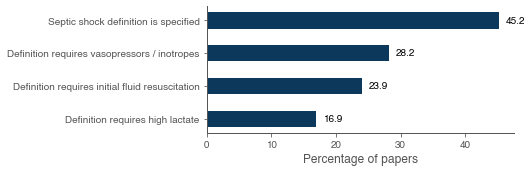

In [9]:
sepsis_definition_criterions = [
    "Septic shock definition is specified",
    "Definition requires vasopressors / inotropes",
    "Definition requires initial fluid resuscitation",
    "Definition requires high lactate"
]
counts = 100*papers_df[sepsis_definition_criterions].mean()
indices = np.argsort(counts)
y_position = np.arange(len(counts))

bars = plt.barh(y_position, counts[indices], height=0.5)
plt.gca().bar_label(bars, fmt='%.1f', padding=7)
plt.xlabel("Percentage of papers")
plt.yticks(y_position, np.array(sepsis_definition_criterions)[indices])
plt.savefig(os.path.join("out", f"Supp - Sepsis shock definition bar.png"))
plt.show()

In [24]:
print('\n'.join(sorted(list(papers_df.columns))))

Algorithms used
Biological / physiological model
Covidence #
Defined using 'Infection + SIRS' 
Defined using Sepsis-3
Defined using clinical codes
Defined using other criteria
Definition requires high lactate
Definition requires initial fluid resuscitation
Definition requires vasopressors / inotropes
External retrospective validation (other hospitals)
External retrospective validation (separate dataset)
Funding source
Internal validation
MIMIC (any version)
Name/names of other public dataset/datasets
Non-randomised interventional validation (clinical trial)
Non-temporal
Number of hospitals is specified
Number of patient episodes is specified
Other public dataset
Post-deployment surveillance
Private dataset / datasets
Prospective observational validation
Randomised interventional validation (clinical trial)
Regulatory approval
Reinforcement learning
Reviewer Name
Sepsis definition is specified
Septic shock definition is specified
Study ID
Supervised learning
Temporal, non-waveform
Tempo

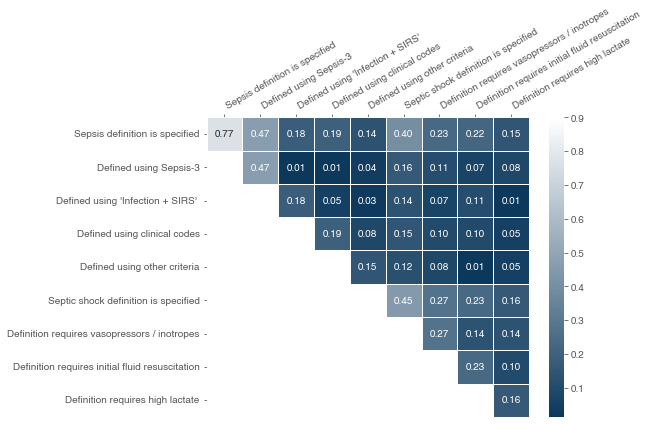

In [48]:
# Heatmap
import numpy as np
import seaborn as sns

sepsis_definition_criterions = [
    "Sepsis definition is specified",
    "Defined using Sepsis-3",
    "Defined using 'Infection + SIRS' ",
    "Defined using clinical codes",
    "Defined using other criteria",
] + [
    "Septic shock definition is specified",
    "Definition requires vasopressors / inotropes",
    "Definition requires initial fluid resuscitation",
    "Definition requires high lactate"
]

def sepsis_def_to_idx(sepsis_def):
    return sepsis_definition_criterions.index(sepsis_def)

n_sepsis_defs = len(sepsis_definition_criterions)
cumulated_counts = np.zeros((n_sepsis_defs, n_sepsis_defs))
for idx_1, def_1 in enumerate(sepsis_definition_criterions):
    for idx_2, def_2 in enumerate(sepsis_definition_criterions):
        n_papers_with_defs = (papers_df[def_1] & papers_df[def_2]).sum()
        cumulated_counts[idx_1, idx_2] = n_papers_with_defs

with plt.rc_context({
    "xtick.bottom": False,
    "xtick.labelbottom": False,
    "xtick.top": True,
    "xtick.labeltop": True,
    "figure.figsize": (9, 6),
}):

    mask = np.tril(np.ones(cumulated_counts.shape)) - np.eye(cumulated_counts.shape[0])
    sns.heatmap(
        cumulated_counts / papers_df.shape[0], annot=True,
        linewidths=.5, cmap=icm_cmp, fmt=".2f", mask=mask,
        vmax=0.9
    )
    plt.yticks([a + 0.5 for a in range(len(sepsis_definition_criterions))], sepsis_definition_criterions, rotation=0)
    plt.xticks([a + 0.5 for a in range(len(sepsis_definition_criterions))], sepsis_definition_criterions, rotation=30, ha='left')
    plt.tight_layout()#subplots_adjust(right=8.5)     # Add space at top
#    plt.savefig(
#        os.path.join("out", f"Supp - Sepsis definition heatmap.png"),
#    )
    plt.show()


**Note:** This plot does not save well, solution has been to copy/paste it into powerpoint and save it as an image from there.

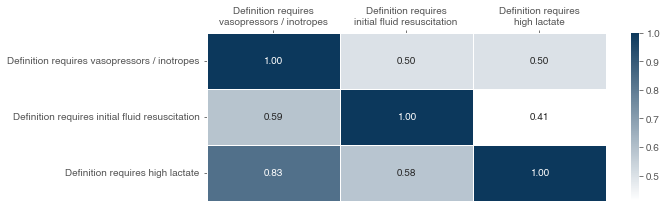

In [11]:
# Normalized heatmap

n_sepsis_defs = len(sepsis_definition_criterions[1:])
cumulated_counts = np.zeros((n_sepsis_defs, n_sepsis_defs))
for idx_1, def_1 in enumerate(sepsis_definition_criterions[1:]):
    for idx_2, def_2 in enumerate(sepsis_definition_criterions[1:]):
        n_papers_with_def1 = papers_df[def_1].sum()
        n_papers_with_def1and2 = (papers_df[def_1] & papers_df[def_2]).sum()
        cumulated_counts[idx_1, idx_2] = n_papers_with_def1and2 / n_papers_with_def1
        
with plt.rc_context({
    "xtick.bottom": False,
    "xtick.labelbottom": False,
    "xtick.top": True,
    "xtick.labeltop": True,
    "figure.figsize": (10, 3),
}):
    #mask = np.tril(np.ones(cumulated_counts.shape)) - np.eye(cumulated_counts.shape[0])
    sns.heatmap(
        cumulated_counts, annot=True, linewidths=.5, cmap=icm_cmp_rev,# mask=mask,
        fmt=".2f"
    )
    xticks = [
        "Definition requires\nvasopressors / inotropes",
        "Definition requires\ninitial fluid resuscitation",
        "Definition requires\nhigh lactate"
    ]
    plt.yticks([a + 0.5 for a in range(len(sepsis_definition_criterions[1:]))], sepsis_definition_criterions[1:], rotation=0)
    plt.xticks(
        [a + 0.5 for a in range(len(sepsis_definition_criterions[1:]))], xticks,
        rotation=0
    )
#    plt.title('Answers the question: "Which proportion of the papers\n using the definition on the left also use the definition on the top ?"')
    plt.savefig(os.path.join("out", f"Supp - sepsis definition normalized heatmap.png"))
    plt.show()


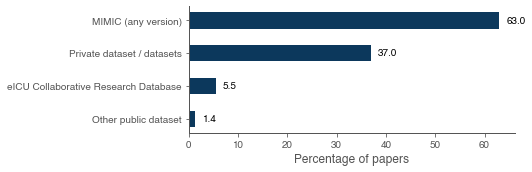

In [14]:
dataset_cols = [
    "MIMIC (any version)",
    "eICU Collaborative Research Database",
    "Private dataset / datasets",
    "Other public dataset"
]
column_names = np.array(dataset_cols)

counts = 100*papers_df[column_names].mean()
indices = np.argsort(counts)
y_position = np.arange(len(counts))

bars = plt.barh(y_position, counts[indices], height=0.5)
plt.gca().bar_label(bars, fmt='%.1f', padding=7)
plt.xlabel("Percentage of papers")
plt.yticks(y_position, column_names[indices])
plt.savefig(os.path.join("out", f"Supp - Database bar.png"))
plt.show()

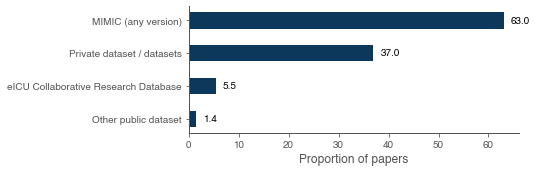

In [15]:
column_names = papers_df.columns[12:16]
counts = 100*papers_df[column_names].mean()
indices = np.argsort(counts)
y_position = np.arange(len(counts))

bars = plt.barh(y_position, counts[indices], height=0.5)
plt.gca().bar_label(bars, fmt='%.1f', padding=7)
plt.xlabel("Proportion of papers")
plt.yticks(y_position, column_names[indices])
plt.show()

In [16]:
(100 * counts / papers_df.shape[0]).round(1)

MIMIC (any version)                     86.3
eICU Collaborative Research Database     7.5
Private dataset / datasets              50.7
Other public dataset                     1.9
dtype: float64

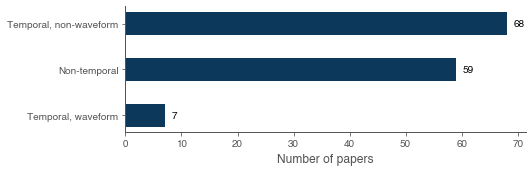

In [17]:
column_names = papers_df.columns[21:24]
counts = papers_df[column_names].sum()
indices = np.argsort(counts)
y_position = np.arange(len(counts))

bars = plt.barh(y_position, counts[indices], height=0.5)
plt.gca().bar_label(bars, padding=7)
plt.xlabel("Number of papers")
plt.yticks(y_position, column_names[indices])
plt.savefig(os.path.join("out", f"Supp - Data types.png"))
plt.show()

In [18]:
(100 * counts / papers_df.shape[0]).round(1)

Non-temporal              80.8
Temporal, non-waveform    93.2
Temporal, waveform         9.6
dtype: float64

Proportion of papers that specified a number of episodes: 97.26027397260275


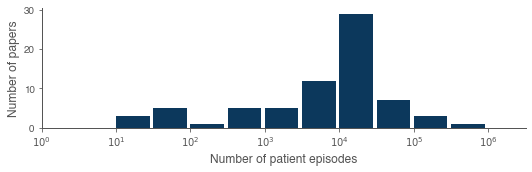

In [19]:
EPISODES_SPECIFIED = "Number of patient episodes is specified"
N_EPISODES = "Total number of patient episodes"
print("Proportion of papers that specified a number of episodes:", papers_df[EPISODES_SPECIFIED].mean() * 100)
bins = np.arange(1, 8, 0.5)
width = 0.9 * 0.5
papers_df[papers_df[EPISODES_SPECIFIED]][N_EPISODES]\
    .apply(lambda x: x.replace(",", "")).astype("int")\
    .apply(lambda x: np.log10(x))\
    .hist(bins=bins, width=width)
plt.xlabel("Number of patient episodes")
plt.ylabel("Number of papers")
plt.xticks(
    np.arange(0, 7), [f'$10^{a}$' for a in np.arange(0, 7)]
)
plt.xlim(0, 6.5)
plt.savefig(os.path.join("out", f"Supp - Number of episodes - hist.png"))
plt.show()

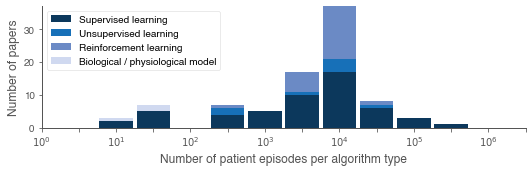

In [62]:
learning_types = ["Supervised learning", "Unsupervised learning", "Reinforcement learning", "Biological / physiological model"]
bins = np.arange(1, 8, 0.5)
width = 0.9 * 0.5
bottom = np.zeros(20, )

for itr, ai_type in enumerate(learning_types):
    values = pd.cut(
        papers_df[papers_df[ai_type] & papers_df[EPISODES_SPECIFIED]][N_EPISODES]\
            .apply(lambda x: x.replace(",", "")).astype("int")\
            .apply(lambda x: np.log10(x)),
        bins=bins, labels=bins[:-1]).value_counts()
    value_indices = (2*np.array(values.index)).astype(int)
    plt.bar(value_indices/2, values, label=ai_type, width=width, bottom=bottom[value_indices])
    
    bottom[value_indices] += values

plt.xlabel("Number of patient episodes per algorithm type")
plt.ylabel("Number of papers")
plt.xticks(
    np.arange(0, 7, 0.5), [f'$10^{int(a)}$' if int(a)==a else '' for a in np.arange(0, 7, 0.5)]
)
plt.xlim(0, 6.5)

plt.legend()
plt.savefig(os.path.join("out", f"Supp - Number of episodes VS algo type hist.png"))
plt.show()

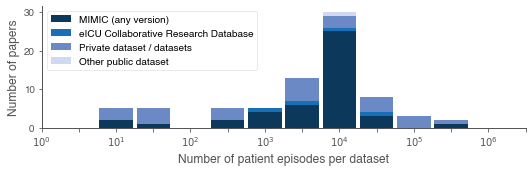

In [61]:
dataset_cols = [
    "MIMIC (any version)",
    "eICU Collaborative Research Database",
    "Private dataset / datasets",
    "Other public dataset"
]

bottom = np.zeros(20, )
for itr, dataset in enumerate(dataset_cols):
    values = pd.cut(
        papers_df[papers_df[dataset] & papers_df[EPISODES_SPECIFIED]][N_EPISODES]\
            .apply(lambda x: x.replace(",", "")).astype("int")\
            .apply(lambda x: np.log10(x)),
        bins=bins, labels=bins[:-1]).value_counts()
    value_indices = (2*np.array(values.index)).astype(int)
    plt.bar(value_indices/2, values, label=dataset, width=width, bottom=bottom[value_indices])
    
    bottom[value_indices] += values

plt.xlabel("Number of patient episodes per dataset")
plt.ylabel("Number of papers")
plt.xticks(
    np.arange(0, 7, 0.5), [f'$10^{int(a)}$' if int(a)==a else '' for a in np.arange(0, 7, 0.5)]
)
plt.xlim(0, 6.5)
plt.legend()

plt.savefig(os.path.join("out", f"Supp - Number of episodes VS dataset hist.png"))
plt.show()

# Type of algorithm

In [ ]:
learning_types = ["Supervised learning", "Unsupervised learning", "Reinforcement learning", "Biological / physiological model"]
(100*papers_df[learning_types].mean()).sort_values().plot.barh()
plt.title("Overall distribution of algorithm types")
plt.xlabel("Percentage of papers")
plt.savefig(os.path.join("out", f"Supp - Algorithm bar.png"))
plt.show()

Observations:
 - Superviser learning is still the most used method, possibly with the task of mortality.shock prediction
 - Reinforcement Learning has been on the rise since 2017, now representing almost as many papers as superviser learning
 - Ohysiological models are a new player in the field

In [ ]:
year_bins = list(range(2000, 2023, 1))
papers_df["Year of publication"].plot.hist(bins=year_bins, width=0.8)
plt.xlabel("Year of publication")
plt.ylabel("Numper of papers")
plt.savefig(os.path.join("out", f"Supp - Overall papers VS time.png"))
plt.show()

In [ ]:
stopwords = ["sepsis", "learning"] + "for of if and the in obn by with using a to an".split(" ")
for learning_type in learning_types:
    wordcloud = WordCloud(
        background_color="white",
        stopwords=stopwords,
        colormap=icm_cmp,
    ).generate(
        papers_df[papers_df[learning_type]]["Title"].str.cat(),
    )

    plt.figure(figsize=(7.5, 7.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    if learning_type == "Biological / physiological model": learning_type = "Physiological models"
    plt.savefig(os.path.join("out", f"Supp - Wordcloud {learning_type}.png"))
    plt.title(f"Word cloud of {learning_type.lower()} papers")
    plt.show()

Observations:
 - Supervised learning Focus more on septic shoch prediction where RL papers have a bigger interest on treatment
 - The word "Reinforcement"appears in the supervised cloud --> supervised learning is sometimes part of a bigger RL agent